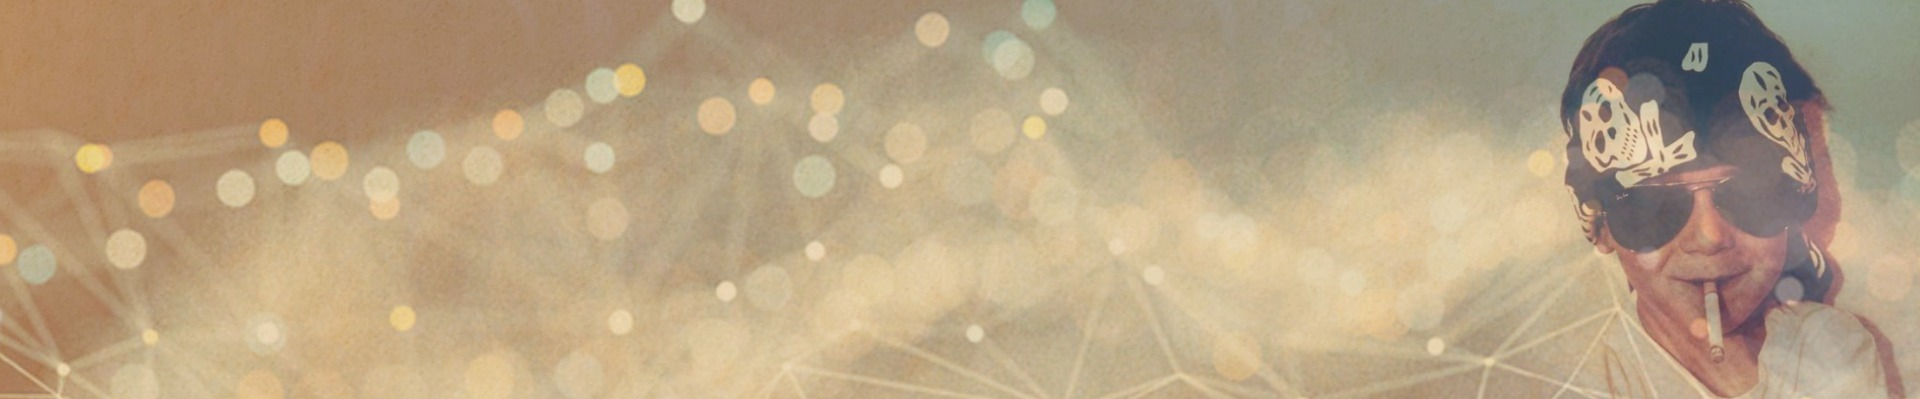

Hello Reader, 

I am the **Dedomena God**. I have the power and purpose of answering decisive questions using Exploratory Data Analysis.

You have just been born! Congratulations, good work on that! Now SURPRISE, babies are boring, so I’m going to jump ahead in time to a point where you’re an adult and you’ve already lived a bunch of your life. But I promise, most of what I’m skipping over was very dull. You ate and slept a lot, made some friends, tears were shed, etc. The awesome stuff starts now!

1. [Introduction](#introduction)
1. [Exploratory Data Analysis](#section-two)    

    * [How Old Were Kagglers When They Started Coding? - Bar Chart](#subsection-one)
    * [Highest Level of Formal Education wrt Gender - Horizontal Bar Chart](#subsection-two)
    * [Kagglers Current Role - Sankey Diagram](#subsection-three)
    * [What Programming Language do Kagglers Recommend to an Aspiring Data Scientist? - Bar Chart](#subsection-four)
    * [Kagglers Most Common Job Position - Bar Chart](#subsection-five)
    * [Current Jobs vs Programming Languages Used on a Regular Basis - Heatmap](#subsection-six)
    * [Current Jobs vs IDE - Heatmap](#subsection-seven)
    * [Salary vs. Usage of Machine Learning wrt Current Role - Violin Plot](#subsection-eight)
    * [Coding Experience vs. Age wrt Salary - Density Contour](#subsection-nine)
    * [Salary vs. Started Coding Age wrt Current Age - Density Contour](#subsection-ten)
    
1. [Conclusion](#conclusion)  
    
    
    
    
 

In [ ]:
import numpy as np
import pandas as pd

#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas_profiling

import os
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

<a id="introduction"></a>
# Introduction
So! Let’s begin, my friend! Hmmm… remind me again who you are?
Oh yes, you are Pedro, a fine 33 year old male creature, and your question was: is it too late to become a Data Scientist? 

Not gonna lie here… It's a difficult question to answer but I’m gonna try and explore the "2020 Kaggle Data Science and Machine Learning Survey" dataset to demystify this question.

In [ ]:
#Import kaggle_survey_2020_respones to pandas DataFrame and extract the first row survey questions as 'questions'
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
questions = df.iloc[0, :]
df = df.iloc[1:, :]

In [ ]:
# Subtrat the age bin from 'Q1' with age coding experience bin 'Q6'
def sub(age, experience):
    if (str(age)[2:3])=='+':
        if (str(experience)[1:2])=='-':
            start_age1= 70 - int(str(experience)[2:4])
            start_age2= 75 - int(str(experience)[:1])
        elif str(experience)[2:3]=='2':
            start_age1= 70 - 2
            start_age2= 75 - 1
        elif (str(experience)[:1])=='I' or (str(experience)[:1])=='n':
            start_age1= 70 - 0
            start_age2= 75 - 0
        elif (str(experience)[2:3])=='+':
            start_age1= 70 - 20
            start_age2= 75 - 20
        elif (str(experience)[:1])=='<':
            start_age1= 70 - 1
            start_age2= 75 - 1
        else:
            start_age1= 70 - int(str(experience)[3:5])
            start_age2= 75 - int(str(experience)[:2]) 
    else:
        if (str(experience)[1:2])=='-':
            start_age1= int(str(age)[:2]) - int(str(experience)[2:4])
            start_age2= int(str(age)[3:5]) - int(str(experience)[:1])
        elif str(experience)[2:3]=='2':
            start_age1= int(str(age)[:2]) - 2
            start_age2= int(str(age)[3:5]) - 1
        elif (str(experience)[:1])=='I' or (str(experience)[:1])=='n':
            start_age1= int(str(age)[:2]) - 0
            start_age2= int(str(age)[3:5]) - 0
        elif (str(experience)[2:3])=='+':
            start_age1= int(str(age)[:2]) - 20
            start_age2= int(str(age)[3:5]) - 20
        elif (str(experience)[:1])=='<':
            start_age1= int(str(age)[:2]) - 1
            start_age2= int(str(age)[3:5]) - 1
        else:
            start_age1= int(str(age)[:2]) - int(str(experience)[3:5])
            start_age2= int(str(age)[3:5]) - int(str(experience)[:2]) 
    if start_age1<10:
        start_age1=10
    if start_age2<10:
        start_age2=10
    return '{}-{} '.format(start_age1, start_age2)

# Apply sub function to 'Q1' and 'Q6' with new name: 'start_age'
for i in range(1,len(df)+1):
    df.loc[i,'start_age']=sub(df.loc[i,'Q1'], df.loc[i,'Q6'])

In [ ]:
# Create new starting coding age bin function
def binar(age_interval):
    if (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 <= 20:
        age_start_bin = '<20'
    elif (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 < 30 and (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 >=20:
        age_start_bin = '20-30'
    elif (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 < 40 and (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 >=30:
        age_start_bin = '30-40'
    elif (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 < 50 and (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 >=40:
        age_start_bin = '40-50'
    elif (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 < 60 and (int(str(age_interval)[:2])+int(str(age_interval)[3:5]))/2 >=50:
        age_start_bin = '50-60'
    else:
        age_start_bin = '60+'
    return age_start_bin

# Apply bin function to 'start_age' with new name: 'start_age_bin'
for i in range(1,len(df)+1):
    df.loc[i,'start_age_bin']= binar(df.loc[i,'start_age'])

# Exploratory Data Analysis
<a id="section-two"></a>
So my first step is to explore the starting age an ordinary human being embraces the “Data Science” career path. I will subtract from their current age the stated coding years of experience and group them in a ten-year interval because that’s how I see mortals:
* <10: I really don’t care;
* 10-20: "Annoying Teens", try to prove me wrong but I know what they do in theirs phones;
* 20-30: "Dunning-Krugers", people who have little knowledge but think they know-it-all;
* 30-40: "Dreamers", like you Pedro, who realized that their dreams have deviated from the obligation of society and are now trying to pursue their dream job;
* 40-50: "The 40s is the new 30s", Dreamers with more responsibilities (wife/ husband and little creatures called children);
* 50-60: "Vintage", The older you get, the wiser you are;
* 60+: "Gandalfs", For even the very wise cannot see all ends.

<a id="subsection-one"></a>

In [ ]:
#New DataFrame w/ 'start_age_bin' wrt 'counts' by value_counts()
df_start_age = df['start_age_bin'].value_counts().rename_axis('start_age_bin').to_frame('counts')
df_start_age

#Graphical Representation 
cat_names = ['Dunning-Krugers','Annoying Teens','Dreamers',"40's The New 30's",'Vintage','Gandalfs']

fig = go.Figure([
    go.Bar(
        x=df_start_age.index,
        y=df_start_age['counts'],
        text=cat_names,
        textposition='outside',
    )
])

fig.update_xaxes(
    categoryorder='array',
    categoryarray= ['<20','20-30','30-40','40-50','50-60','60+']
)

fig.update_traces(marker_color=['#E2F0CB','#B5EAD7','#FFDAC1','#FFB7B2','#FF9AA2','#FF9AA2'])

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title='How Old Were Kagglers When They Started Coding?' \
          '<br><span style="font-size:10px"><i>Are You a Dreamer?</span></i>',
    xaxis_title="Started Coding Age Bin",
    yaxis_title="Count",
)

fig.show()

> Well, well, well... It looks like around 74% of human Kagglers start programming before their 30s.

<a id="subsection-two"></a>
This means that a quarter of all Kagglers actually started coding after their 30s Pedro! But are they currently living the dream? Let's have a closed look at what they're doing now:

<a id="subsection-two"></a>

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing = 0)

degree=['I prefer not to answer',
        'No formal education<br>past high school',
        'Some college/university<br>study without earning<br>a bachelor’s degree',
        'Professional degree',
        'Bachelor’s degree',
        'Master’s degree',
        'Doctoral degree']

color_men = ['lightblue'] * 7
color_women = ['pink'] * 7
color_other = ['#FFDAC1'] * 7

fig.add_trace(go.Bar(name='Man', y=degree, x=[232, 92, 221,237, 906, 1862,731],orientation='h',marker_color=color_men),row=1, col=1)
fig.add_trace(go.Bar(name='Woman', y=degree, x=[46, 4, 29, 43, 164, 412, 171],orientation='h',marker_color=color_women),row=1, col=1)
fig.add_trace(go.Bar(name='Other', y=degree, x=[16, 4, 5, 2, 19, 37, 14],orientation='h', marker_color=color_other), row=1, col=1)

fig.add_trace(go.Bar(name='Man', y=degree, x=[78.9, 92.0, 86.7,84.0, 83.2, 80.6,79.8],orientation='h',marker_color=color_men, showlegend=False),row=1, col=2)
fig.add_trace(go.Bar(name='Woman', y=degree, x=[15.6, 4.0, 11.4, 15.2, 15.1, 17.8, 18.7],orientation='h',marker_color=color_women, showlegend=False),row=1, col=2)
fig.add_trace(go.Bar(name='Other', y=degree, x=[5.5, 4.0, 1.9, 0.8, 1.7, 1.6, 1.5],orientation='h', marker_color=color_other, showlegend=False), row=1, col=2)

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
                  'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
                  barmode='stack',
                  title='Kagglers that Started Coding at 30+ Years Old,<br>Highest Level of Formal Education wrt Gender' \
          '<br><span style="font-size:10px"><i>What\'s Your Highest Degree Pedro?</span></i>')

# edit axis labels
fig['layout']['xaxis']['title']='Count'
fig['layout']['xaxis2']['title']='%'

fig.show()

> Woah, not only more than 80% are man, more than 60% have at least a Master's degree. Impressive! <br> It's also interesting to observe that women's percentage increase along the formal education hierarchy. Almost 4% more wrt to other genders when compared between a Bachelor's degree vs. a Doctoral degree.

How about current roles and jobs? Let's observe what your fellow friends that started after 30 are doing...

<a id="subsection-three"></a>

In [ ]:
linkColor = ['#f3f3f3'] * 50
for x in range(4,16): linkColor[x] = '#B5EAD7'

fig = go.Figure(data=[go.Sankey( arrangement = "snap",
    node = dict(
      pad = 10,
      thickness = 5,
      line = dict(color = "black", width = 0),
      label = ["2020 Survey", "Worker", "Student", "Started Coding 30+", "Currently not employed",
               "Other", "Data Scientist", "Data Analyst", "Research Scientist", "Product/Project Manager", "Software Engineer", "Business Analyst", "Machine Learning Engineer", "Statistician", "Data Engineer", "DBA/Database Engineer",
               ],
        x = [0, 0.25, 0.25, 0.35, 1],
        y = [0, 0.25, 0.25, 0.05, 1],
      color = 'lightblue'
    ),
    link = dict(
      source = [   0,    0,     0,    1,   3,   3,   3,  3,    3,   3,   3,   3,   3,   3,   3,  3,    1,    1,    1,    1,    1,    1,   1,   1,   1,   1,  1], 
      target = [   2,    4,     1,    3,   5,   6,   4,  7,    8,   9,  10,  11,  12,  13,  14, 15,    6,   10,    5,    7,    8,   12,  11,   9,  14,  13, 15],
      value =  [5171, 1652, 12454, 5038, 894, 612, 589, 507, 462, 423, 368, 368, 171, 114, 110, 56, 2676, 1968, 1737, 1475, 1174, 1082, 798, 692, 437, 290, 125],
      color = linkColor

  ))])

fig.update_layout(title="Kagglers Current Role" \
          '<br><span style="font-size:10px"><i>Do You Want to Be a Data Scientist Too?</span></i>')
fig.show()

> Damnn... I'm impressed, almost everyone is working within the data-driven professional spectrum! 
As for your uncertainties Pedro, this is actually super positive. I hope you will seek inspiration from these numbers whenever you are in doubt regarding your career path.
Only 12% of your fellow friends are unemployed and 18% still haven't been able to flex one of the many iconic job titles in the data industry.

What about the initial boost you should account regarding programming languages?

Let me guide you through the first decisions you should commit, otherwise you will lose yourself like mortals usually like to do !

<a id="subsection-four"></a>

In [ ]:
df_student = df.loc[(df['Q5'] == 'Student')]
df_worker = df.loc[(df['Q5'] != 'Student')]


import plotly.graph_objects as go

q8 = 'Python', 'R', 'C++', 'SQL', 'MATLAB', 'C', 'Other', 'Javascript', 'Java', 'Julia', 'None', 'Swift', 'Bash'

fig = go.Figure()
fig.add_trace(go.Bar(
    x=q8,
    y=df_worker['Q8'].value_counts()/len(df_worker),
    name='Workers opinion',
    marker_color='#E2F0CB'
))
fig.add_trace(go.Bar(
    x=q8,
    y=df_student['Q8'].value_counts()/len(df_student),
    name='Students Opinion',
    marker_color='#FFB7B2'
))

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0.1,
    title='What Programming Language do Kagglers Recommend to an Aspiring Data Scientist?' \
          '<br><span style="font-size:10px"><i>What About FORTRAN?</span></i>',
    xaxis_title="Programming Language",
    yaxis_title="%")


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()


> According to all mortal Kagglers, the best Programming Language to start is **Python**. What a surprise...

I divided the dataset in student vs workers because those two types usually diverge, but not in this case.
So, if you want to start coding, don't think twice and jump right in with **Python**!! 

As I am a god, I have no time to lose so let's assume that you have already started programming. What career do you want after all?

I will discard all students for this analysis since, unlike me, you have to make money to live.
<a id="subsection-five"></a>

In [ ]:
df_worker_1 = df_worker['Q5'].value_counts().rename_axis('Q5').to_frame('counts')



#Graphical Representation 

fig = go.Figure([
    go.Bar(
        x=df_worker_1.index,
        y=df_worker_1['counts'],
        text=df_worker_1['counts'],
        textposition='outside',
    )
])


fig.update_traces(marker_color=['#E2F0CB','#B5EAD7','#f3f3f3','#f3f3f3','#FFDAC1','#FFB7B2','#FF9AA2','#e7cbf0','#f3f3f3','#f3f3f3','#f3f3f3','#f3f3f3'])

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title='Kagglers Most Common Job Position' \
          '<br><span style="font-size:10px"><i>Job Tile == \'Supreme Being/ Creator\'; Count = 1</span></i>',
    xaxis_title="Job Title",
    yaxis_title="Count"
)

fig.show()

There's a lot of potencial... 
Let's analyse the first top six careers (70% of the dataset) and explore what languages these mortals mostly use during work.  
<a id="subsection-six"></a>

In [ ]:
df_data_scientist = df.loc[(df['Q5'] == 'Data Scientist')]
df_software_engineer = df.loc[(df['Q5'] == 'Software Engineer')]
df_data_analyst = df.loc[(df['Q5'] == 'Data Analyst')]
df_research_scientist = df.loc[(df['Q5'] == 'Research Scientist')]
df_machine_engineer = df.loc[(df['Q5'] == 'Machine Learning Engineer')]
df_business_analyst = df.loc[(df['Q5'] == 'Business Analyst')]
df_product = df.loc[(df['Q5'] == 'Product/Project Manager')]

df_q7_data_scientist = df_data_scientist[[i for i in df_data_scientist.columns if 'Q7' in i]]
df_q7_count_data_scientist = pd.Series(dtype='int')

for i in df_q7_data_scientist.columns:
    df_q7_count_data_scientist[df_q7_data_scientist[i].value_counts().index[0]] = df_q7_data_scientist[i].count()/len(df_data_scientist)

    
df_q7_software_engineer = df_software_engineer[[i for i in df_software_engineer.columns if 'Q7' in i]]
df_q7_count_software_engineer = pd.Series(dtype='int')
for i in df_q7_software_engineer.columns:
    df_q7_count_software_engineer[df_q7_software_engineer[i].value_counts().index[0]] = df_q7_software_engineer[i].count()/len(df_software_engineer)

df_q7_data_analyst = df_data_analyst[[i for i in df_data_analyst.columns if 'Q7' in i]]
df_q7_count_data_analyst = pd.Series(dtype='int')
for i in df_q7_data_analyst.columns:
    df_q7_count_data_analyst[df_q7_data_analyst[i].value_counts().index[0]] = df_q7_data_analyst[i].count()/len(df_data_analyst)
    
df_q7_research_scientist = df_research_scientist[[i for i in df_research_scientist.columns if 'Q7' in i]]
df_q7_count_research_scientist = pd.Series(dtype='int')
for i in df_q7_research_scientist.columns:
    df_q7_count_research_scientist[df_q7_research_scientist[i].value_counts().index[0]] = df_q7_research_scientist[i].count()/len(df_research_scientist)
    
df_q7_machine_engineer = df_machine_engineer[[i for i in df_machine_engineer.columns if 'Q7' in i]]
df_q7_count_machine_engineer = pd.Series(dtype='int')
for i in df_q7_machine_engineer.columns:
    df_q7_count_machine_engineer[df_q7_machine_engineer[i].value_counts().index[0]] = df_q7_machine_engineer[i].count()/len(df_machine_engineer)

df_q7_business_analyst = df_business_analyst[[i for i in df_business_analyst.columns if 'Q7' in i]]
df_q7_count_business_analyst = pd.Series(dtype='int')
for i in df_q7_business_analyst.columns:
    df_q7_count_business_analyst[df_q7_business_analyst[i].value_counts().index[0]] = df_q7_business_analyst[i].count()/len(df_business_analyst)

df_q7_product = df_product[[i for i in df_product.columns if 'Q7' in i]]
df_q7_count_product = pd.Series(dtype='int')
for i in df_q7_product.columns:
    df_q7_count_product[df_q7_product[i].value_counts().index[0]] = df_q7_product[i].count()/len(df_product)
 
df_q9_data_scientist = df_data_scientist[[i for i in df_data_scientist.columns if 'Q9' in i]]
df_q9_count_data_scientist = pd.Series(dtype='int')

for i in df_q9_data_scientist.columns:
    df_q9_count_data_scientist[df_q9_data_scientist[i].value_counts().index[0]] = df_q9_data_scientist[i].count()/len(df_data_scientist)

    
df_q9_software_engineer = df_software_engineer[[i for i in df_software_engineer.columns if 'Q9' in i]]
df_q9_count_software_engineer = pd.Series(dtype='int')
for i in df_q9_software_engineer.columns:
    df_q9_count_software_engineer[df_q9_software_engineer[i].value_counts().index[0]] = df_q9_software_engineer[i].count()/len(df_software_engineer)

df_q9_data_analyst = df_data_analyst[[i for i in df_data_analyst.columns if 'Q9' in i]]
df_q9_count_data_analyst = pd.Series(dtype='int')
for i in df_q9_data_analyst.columns:
    df_q9_count_data_analyst[df_q9_data_analyst[i].value_counts().index[0]] = df_q9_data_analyst[i].count()/len(df_data_analyst)
    
df_q9_research_scientist = df_research_scientist[[i for i in df_research_scientist.columns if 'Q9' in i]]
df_q9_count_research_scientist = pd.Series(dtype='int')
for i in df_q9_research_scientist.columns:
    df_q9_count_research_scientist[df_q9_research_scientist[i].value_counts().index[0]] = df_q9_research_scientist[i].count()/len(df_research_scientist)
    
df_q9_machine_engineer = df_machine_engineer[[i for i in df_machine_engineer.columns if 'Q9' in i]]
df_q9_count_machine_engineer = pd.Series(dtype='int')
for i in df_q9_machine_engineer.columns:
    df_q9_count_machine_engineer[df_q9_machine_engineer[i].value_counts().index[0]] = df_q9_machine_engineer[i].count()/len(df_machine_engineer)

df_q9_business_analyst = df_business_analyst[[i for i in df_business_analyst.columns if 'Q9' in i]]
df_q9_count_business_analyst = pd.Series(dtype='int')
for i in df_q9_business_analyst.columns:
    df_q9_count_business_analyst[df_q9_business_analyst[i].value_counts().index[0]] = df_q9_business_analyst[i].count()/len(df_business_analyst)

df_q9_product = df_product[[i for i in df_product.columns if 'Q9' in i]]
df_q9_count_product = pd.Series(dtype='int')
for i in df_q9_product.columns:
    df_q9_count_product[df_q9_product[i].value_counts().index[0]] = df_q9_product[i].count()/len(df_product)
 
df_q7 = {'Languages': ['Python','R','SQL','C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other'],
        'data_scientist': df_q7_count_data_scientist,
         'software_engineer':df_q7_count_software_engineer,
         'data_analyst': df_q7_count_data_analyst,
         'research_scientist': df_q7_count_research_scientist,
         'machine_engineer':  df_q7_count_machine_engineer,
         'business_analyst': df_q7_count_business_analyst,
        }
df_q7 = pd.DataFrame(df_q7, columns = ['data_scientist','software_engineer', 'data_analyst','research_scientist','machine_engineer', 'business_analyst'])

df_q9 = {'IDEs': ['JupyterLab (or products based off of Jupyter)','RStudio','Visual Studio','VS Code', 'PyCharm', 'Spyder', 'Notepad++', 'SublimeText', 'Vim,Emacs, or similar','MATLAB', 'None', 'Other'],
        'data_scientist': df_q9_count_data_scientist,
         'software_engineer':df_q9_count_software_engineer,
         'data_analyst': df_q9_count_data_analyst,
         'research_scientist': df_q9_count_research_scientist,
         'machine_engineer':  df_q9_count_machine_engineer,
         'business_analyst': df_q9_count_business_analyst,
        }
df_q9 = pd.DataFrame(df_q9, columns = ['data_scientist','software_engineer', 'data_analyst','research_scientist','machine_engineer', 'business_analyst'])

fig = go.Figure(data=go.Heatmap(
    z=df_q7,
    colorscale=[
        # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0, "#F6F6F6"],
        [0.1, "#F6F6F6"],

        # Let values between 10-20% of the min and max of z
        # have color rgb(20, 20, 20)
        [0.2, "#FFE3D8"],
        [0.4, "#FFE3D8"],

        # Values between 20-30% of the min and max of z
        # have color rgb(40, 40, 40)
        [0.4, "#FFE2E2"],
        [0.5, "#FFE2E2"],

        [0.6, "#FFC7C7"],
        [0.8, "#FFC7C7"],

        [0.9, "#8785A2"],
        [1.0, "#8785A2"],
    ], 
    x=['data_scientist','software_engineer', 'data_analyst','research_scientist','ml_engineer', 'business_analyst'],
    y=['Python','R','SQL','C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other'],
    hoverongaps = False))
fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title='Current Jobs vs Programming Languages Used on a Regular Basis' \
          '<br><span style="font-size:10px"><i>Python Pleaseee</span></i>'
)

fig.show()

>**Python is a winner again !** Apparently Kaggle is kind of a Python fan club and around 91% of Data Scientists use Python everyday! 

>As I am omniscient I learn everything at a speed that you wound not understand. But if you have time, dedicate it to understanding **SQL**. As you can see from the heatmap, there are others languages (like SQL) that are very important to the career of many people that pursue a career as a Data Scientist(55%), Data Analyst(55%) or Business Analyst(51%).

>Software Development languages (Java and Javascript) are really interesting languages to learn if you want to become a Software Engineer(Java is used by 37% of software engineers, while JavaScript accounts for 43%).

The next question that should pop up in your little brains is: What about the IDE (Integrated Development Environment)? 

>If you are not familiar with this expression you should !! 
>An IDE is where all the magic happens! It is where a code assister, a builder, a debugger, a placeholder, a code editor, a syntax highlighting, a compile time checking upon typing and on save, etc etc and many other features exist.
<a id="subsection-seven"></a>

In [ ]:
fig = go.Figure(data=go.Heatmap(
    z=df_q9,
    colorscale=[
        # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0, "#F6F6F6"],
        [0.1, "#F6F6F6"],

        # Let values between 10-20% of the min and max of z
        # have color rgb(20, 20, 20)
        [0.2, "#FFE3D8"],
        [0.4, "#FFE3D8"],

        # Values between 20-30% of the min and max of z
        # have color rgb(40, 40, 40)
        [0.4, "#FFE2E2"],
        [0.5, "#FFE2E2"],

        [0.6, "#FFC7C7"],
        [0.8, "#FFC7C7"],

        [0.9, "#8785A2"],
        [1.0, "#8785A2"],
    ], 
    x=['data_scientist','software_engineer', 'data_analyst','research_scientist','machine_engineer', 'business_analyst'],
    y=['JupyterLab (based off of Jupyter)','RStudio','Visual Studio','VS Code', 'PyCharm', 'Spyder', 'Notepad++', 'SublimeText', 'Vim,Emacs, or similar','MATLAB', 'None', 'Other'],
    hoverongaps = False))

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title='Current Jobs vs IDE' \
          '<br><span style="font-size:10px"><i>Let\'s Just Say I Created Atom(s)</span></i>'
)


fig.show()

> Hummm... Those numbers aren't as obvious as the previous heatmap. Although you can see a clear winner - **Jupyter** (More than 50% voted for JupyterLab in almost every job position)!
> 

**WOAH Python & Jupyter the perfect couple !**

>**Visual Studio** as a lot of potential too. Software Engineers, for example, use as much Jupyter as VS Code... Hummm isn't it interesting ? Software Engineer also prefer to use different languages as opposed to the other Kagglers (from previous heatmap conclusions). 

>You can say that Python & Jupyter are a perfect match, but when you extend it to other languages, Jupyter isn't often the primary choice...

**Note:** It's important to reinforce that I'm only analysing workers. Students can have a different opinion, but they don't yet understand the exciting life of someone who is working with data full time.

In [ ]:
#New DataFrame w/ Salary Question
df_sal = df['Q24']

#Dropping NULL Values
df_sal = df_sal.dropna()

#Dividing Series in 2 based on "-" and Adding it to two columns on the DataFrame ['0','1']
df_sal = df_sal.str.split(r"-", expand=True)

#Strip everything from both columns and only leave numbers
df_sal[0] = df_sal[0].str.replace("[^0-9]",'')
df_sal[1] = df_sal[1].str.replace("[^0-9]",'')

#If there is only one number, fill the second columnd with the same number
df_sal[1] = df_sal[1].fillna(df_sal[0])

#Convert to integer
df_sal[0] = df_sal[0].astype(str).astype(int)
df_sal[1] = df_sal[1].astype(str).astype(int)

#Calculate de average salary based on the interval
df_sal['average_sal'] = (df_sal[0] + df_sal[1]) / 2

#Merge the DataFrame with the primary df based on index to a new df3 to continue with analysis based on other awnsers
df3 = pd.merge(df, df_sal['average_sal'], left_index=True, right_index=True)

In [ ]:
mapping = {'5-10 years': 7.5, '10-20 years': 15, '3-5 years': 4,
           '< 1 years': 0.5, '1-2 years': 1.5, '20+ years': 20, 'I have never written code' : 0}

df3['coding_age_avg'] = df['Q6'].map(mapping)

df3['age_avg'] = df3['Q1'].str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)
df3['start_coding_avg'] = df3['start_age'].str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)


Now… Before you jump to the important part, it's important to understand what's Machine Learning:  

It’s a bit difficult to precisely define machine learning (ML). You would get a different explanation depending on whom you ask. NVIDIA describes it as “the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” McKinsey&Company agree with NVIDIA, saying that ML is “based on algorithms that can learn from data without relying on rules-based programming.”  

Let’s analyze, if learning ML in the long term, pays off (literally):
<a id="subsection-eight"></a>

In [ ]:
df4 = df3.loc[(df3['average_sal'] < 200000)]
mapping = {'I do not use machine learning methods': True}
df4['ML'] = df4['Q15'].map(mapping)
df4['ML'].fillna(value=False, inplace=True)
df4["All"] = 1


fig = go.Figure()

fig.add_trace(go.Violin(x=df4['Q5'],
                        y=df4['average_sal'][ df4['ML'] == True ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='#B5EAD7')
             )
fig.add_trace(go.Violin(x=df4['Q5'],
                        y=df4['average_sal'][ df4['ML'] == False ],
                        legendgroup='No',scalegroup='No', name='No',
                        side='negative',
                        line_color='pink')
             )
fig.update_traces(meanline_visible=True,points=False)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title="Salary vs. Usage of Machine Learning wrt Current Role" \
          '<br><span style="font-size:10px"><i></span></i>',
)

fig.show()

> Hummmm…. Interesting, this was not what I was expecting. Apparently only if you are a Statistician or a Database Engineer, you’ll be rewarded with more money for using ML.  

Nevertheless, the mean difference is not significant. The practical applications of ML drive businesses results, which can dramatically affect a company’s bottom line. For that reason, we should expect a higher rewarding salary for professionals who successfully innovate.

Though, do you really need years of coding and experience to become a professional outlier when it comes to salary compensation?
<a id="subsection-nine"></a>

In [ ]:
df3['avg_sal_bin'] = pd.cut(x=df3['average_sal'], bins=[0, 1000, 1500, 17500, 65000, 137500,500000])
df3 = df3.sort_values('avg_sal_bin')

fig = px.density_contour(df3,
                         x='age_avg',
                         y='coding_age_avg',
                         marginal_x="histogram",
                         marginal_y="histogram",
                         color="avg_sal_bin",
                         labels={"age_avg": "How Old Are You?"'<br><span style="font-size:10px"><i>in years</span></i>',
                                 "coding_age_avg": "How Long Have You Been Coding?"'<br><span style="font-size:10px"><i>in years</span></i>',
                                 "avg_sal_bin": "Salary"'<br><span style="font-size:10px"><i>in USD</span></i>'}
                         )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title="Coding Experience vs. Age wrt Salary"
)
    
fig.show()

> A higher salary is usually correlated with age. Naturally, the older you get the wiser you become. And, that's exactly why people with 10 or more years of coding experience are rewarded with a higher salary. 

Try it for yourself! Hit your expected yearly salary on the 2D Histogram Contour above and check the age and coding experience of other Kagglers.

Are you like Pedro? In your 30's jumping right into the Data Science hypetrain and expect to earn over 100k a year? Stated as "The Sexiest Job of the 21st Century" by HBR, you will have to work hard if you expect a salary of a senior position with less than 5 years of coding experience.  

But what exactly are you up against? Click on your current age bin on the second density contour below and place you mouse over at how old you were when you started coding. That's the average yearly salary. Try and beat the oddds.
<a id="subsection-ten"></a>

In [ ]:
df3 = df3.sort_values('Q1')
fig = px.density_contour(df3,
                         x='start_coding_avg',
                         y='average_sal',
                         marginal_x="histogram",
                         marginal_y="histogram",
                         color="Q1",
                         labels={"start_coding_avg": "How Old Were You When You Started Coding?"'<br><span style="font-size:10px"><i>in years</span></i>',
                                 "average_sal": "What's Your Average Yearly Salary?"'<br><span style="font-size:10px"><i>in USD</span></i>',
                                 "Q1": "How Old Are You?"'<br><span style="font-size:10px"><i>in years</span></i>'})

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'},
    bargap=0,
    title="Salary vs. Started Coding Age wrt Current Age" \
          '<br><span style="font-size:10px"><i></span></i>',
)
fig.show()

> As expected, for a selected age bin, the earlier you started coding the more likely it is to earn more than others at the same given age bin. 

Start to code as soon as possible and you will surely be rewarded on the long run.
Ohh.. You just started a couple of months ago and want further help to step into the data industry? That's up to you. Call me again if you're really desperate and I'll try to help you again.

<a id="conclusion"></a>
# Conclusion
My dear Pedro, as you can see, it’s a great day to be alive. You’ll have an incredible career even if you start now. As we have previously analyzed, there are some differences regarding the professional path you end up choosing, however, all are promising and require a great deal of initial work. 

Kaggle is full of amazing creatures that can inspire you. Joining this community is a great way to start !! 

Please, do not bother me again, as you can imagine, I have a lot to do in my agenda. You are not the first creature, and unfortunately, you are not going to be the last one to ask me if they're too old for Data Science.

Best of luck,  

**Dedomena God, The God of Data** 

<img src="https://media.giphy.com/media/OV606AIcx31za/giphy.gif">